In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
Medical_insurance_Data = pd.read_csv('insurance.csv')

In [3]:
Medical_insurance_Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
Medical_insurance_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
Medical_insurance_Data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


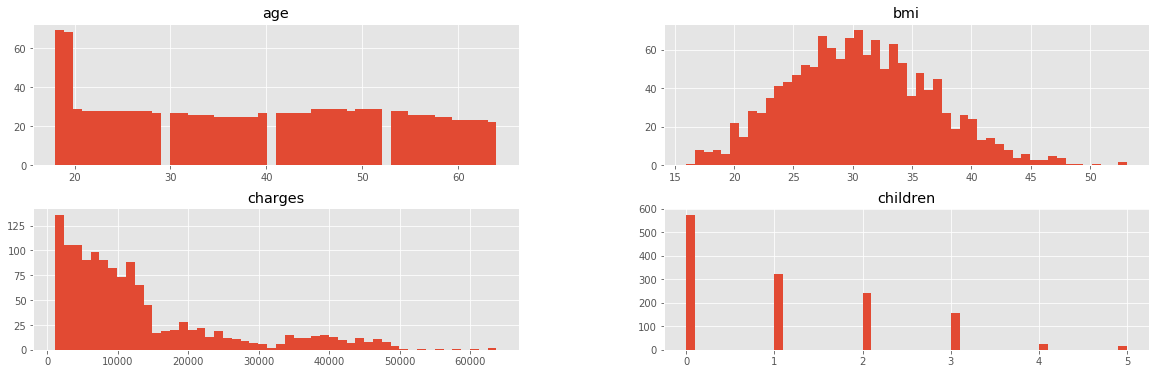

In [6]:
Medical_insurance_Data.hist(bins= 50, figsize=(20,6))
plt.show()

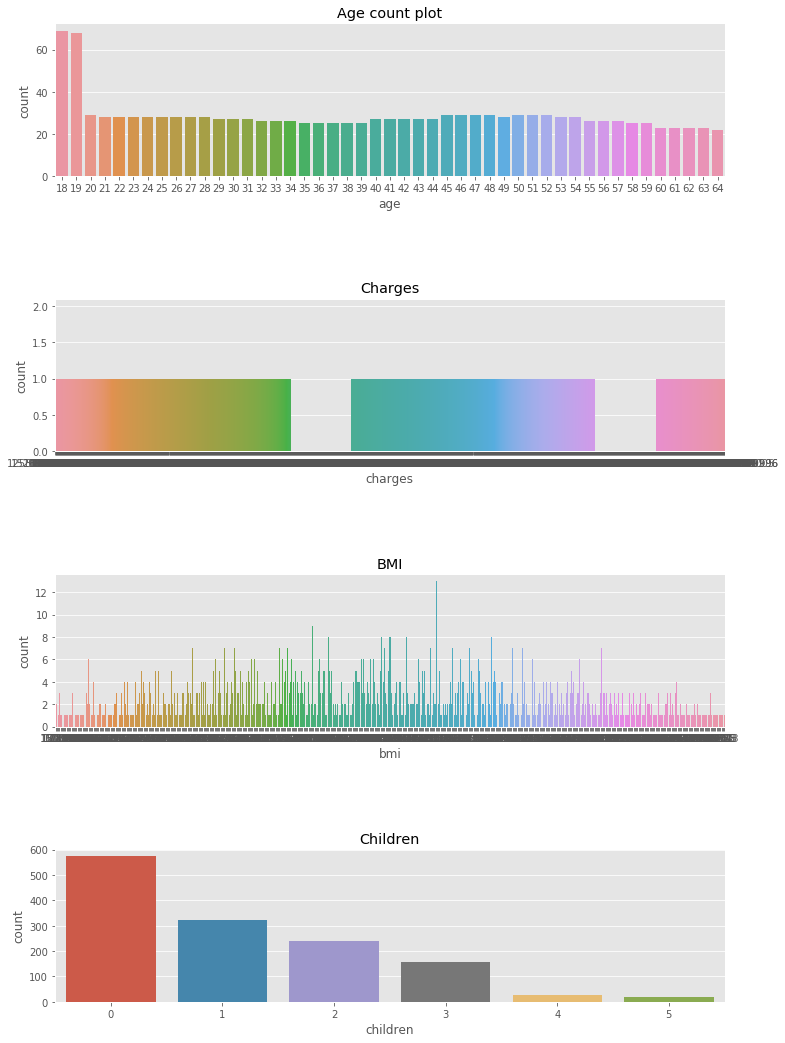

In [7]:
f, ax = plt.subplots( 4, figsize=(12,18))
sns.countplot('age', data=Medical_insurance_Data, ax= ax[0])
sns.countplot('charges', data=Medical_insurance_Data, ax=ax[1])
sns.countplot('bmi', data=Medical_insurance_Data, ax=ax[2])
sns.countplot('children', data=Medical_insurance_Data, ax=ax[3])
ax[0].set_title('Age count plot')
ax[1].set_title('Charges')
ax[2].set_title('BMI')
ax[3].set_title('Children')
plt.subplots_adjust(hspace = 0.8)

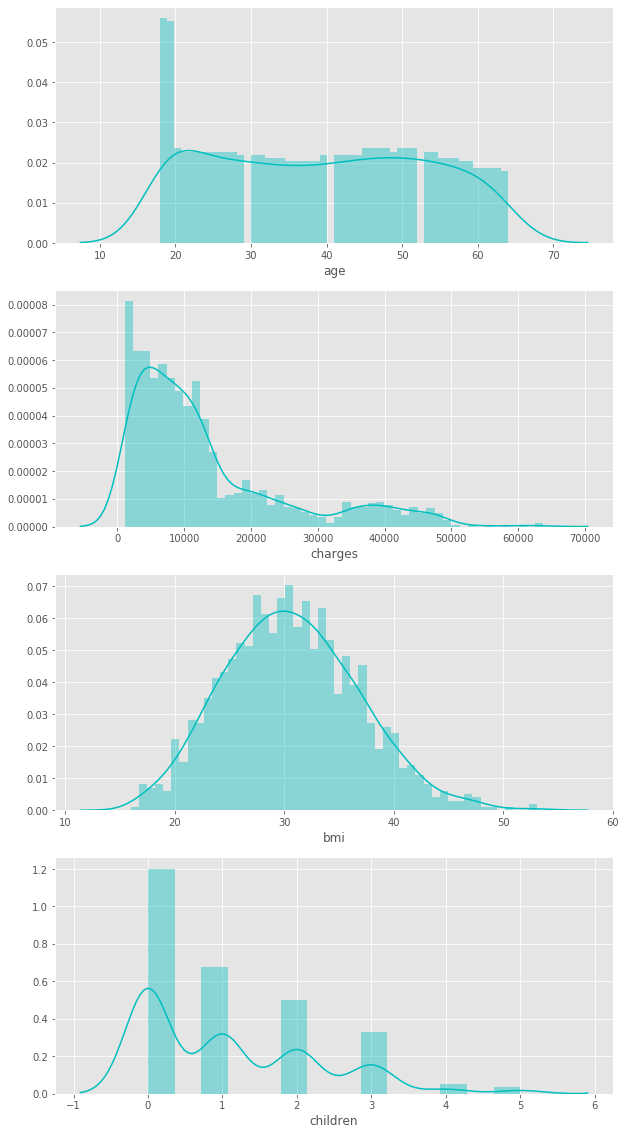

In [8]:
f, ax = plt.subplots(4, figsize=(10,20))
sns.distplot(Medical_insurance_Data.age ,color='c',ax=ax[0], bins= 50)
sns.distplot(Medical_insurance_Data.charges,color='c',ax=ax[1], bins = 50)
sns.distplot(Medical_insurance_Data.bmi,color='c',ax=ax[2], bins= 50)
sns.distplot(Medical_insurance_Data.children,color='c',ax=ax[3])

In [9]:
sex = pd.get_dummies(Medical_insurance_Data['sex'], drop_first=True)

In [10]:
Medical_insurance_Data.drop('sex', axis= 1, inplace= True)

In [11]:
Medical_insurance_Data = pd.concat([Medical_insurance_Data, sex], axis=1)

In [12]:
smoker = pd.get_dummies(Medical_insurance_Data['smoker'], drop_first=True)
Medical_insurance_Data.drop('smoker', axis= 1, inplace= True)
Medical_insurance_Data = pd.concat([Medical_insurance_Data, smoker], axis=1)

In [13]:
Medical_insurance_Data

,age,bmi,children,region,charges,male,yes
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,1,0
1334,18,31.920,0,northeast,2205.98080,0,0
1335,18,36.850,0,southeast,1629.83350,0,0
1336,21,25.800,0,southwest,2007.94500,0,0


In [14]:
Medical_insurance_Data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
region = pd.get_dummies(Medical_insurance_Data['region'], drop_first=True)
Medical_insurance_Data.drop('region', axis= 1, inplace= True)
Medical_insurance_Data = pd.concat([Medical_insurance_Data, region], axis=1)

In [16]:
Medical_insurance_Data.rename(columns={'male':'sex_0F_1M', 'yes':'smoker'}, inplace=True)

In [17]:
Medical_insurance_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
age          1338 non-null int64
bmi          1338 non-null float64
children     1338 non-null int64
charges      1338 non-null float64
sex_0F_1M    1338 non-null uint8
smoker       1338 non-null uint8
northwest    1338 non-null uint8
southeast    1338 non-null uint8
southwest    1338 non-null uint8
dtypes: float64(2), int64(2), uint8(5)
memory usage: 48.5 KB


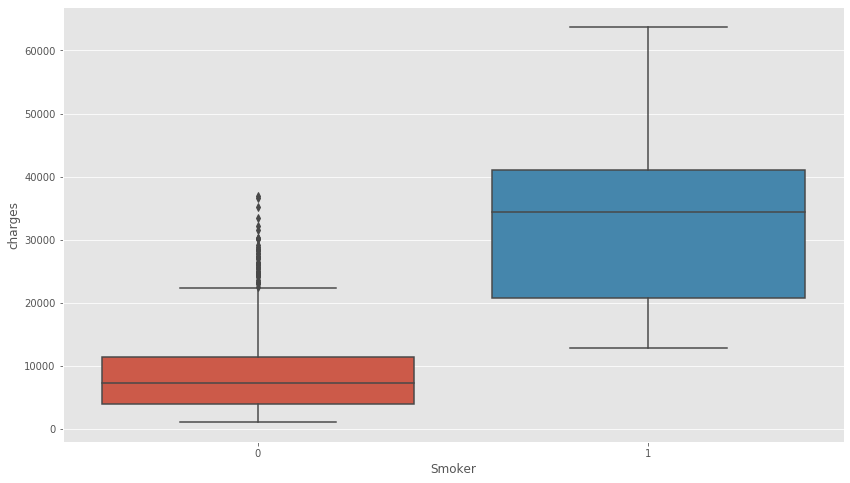

In [18]:
plt.figure(figsize=(14, 8))
sns.boxplot(Medical_insurance_Data.smoker, Medical_insurance_Data.charges)
plt.xlabel("Smoker")
plt.ylabel("charges")
plt.show()

Text(0.5, 0, 'Sex')

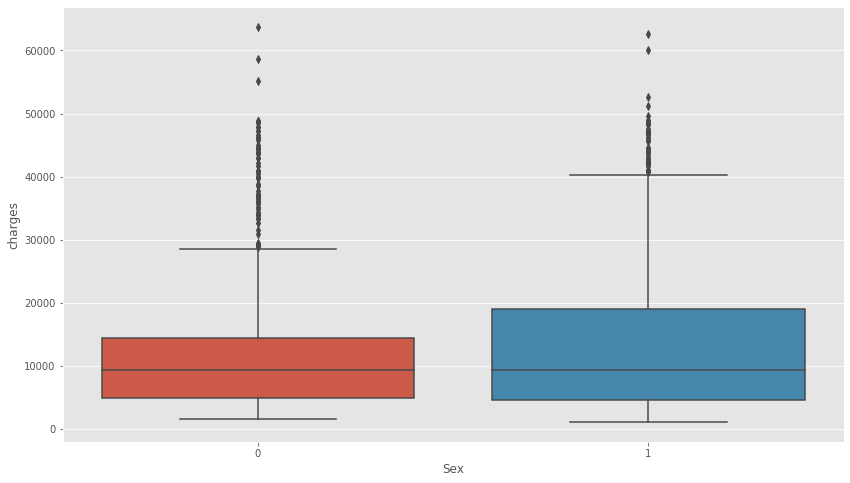

In [19]:
plt.figure(figsize=(14, 8))
sns.boxplot(Medical_insurance_Data.sex_0F_1M, Medical_insurance_Data.charges)
plt.xlabel("Sex")

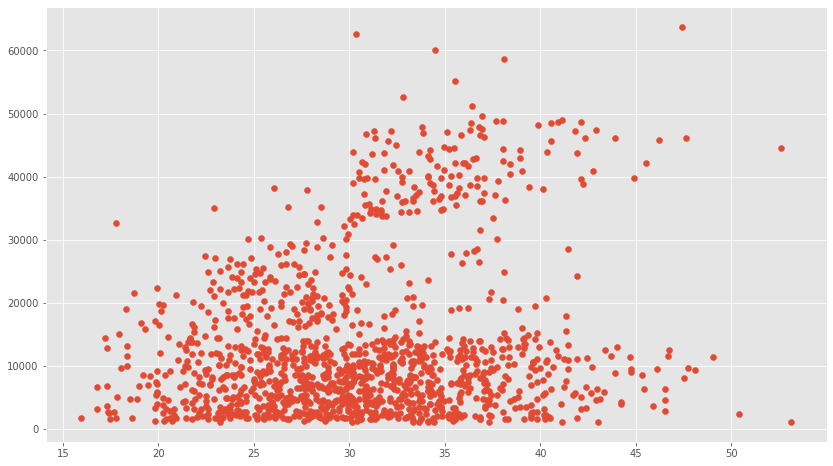

In [20]:
plt.figure(figsize=(14, 8))
plt.scatter(Medical_insurance_Data.bmi, Medical_insurance_Data.charges)


In [21]:
Medical_insurance_Data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_0F_1M', 'smoker', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [22]:
X_feat = Medical_insurance_Data[['age', 'bmi', 'children', 'sex_0F_1M', 'smoker', 'northwest','southeast', 'southwest']]
Y = Medical_insurance_Data['charges']

In [23]:
X_feat

,age,bmi,children,sex_0F_1M,smoker,northwest,southeast,southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [24]:
from sklearn.model_selection import  train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, Y , test_size=0.30, random_state=5)

In [26]:
print('The number of Training Examples: ', X_train.shape[0])
print('The number of Test Examples: ', X_test.shape[0])

The number of Training Examples:  936
The number of Test Examples:  402


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
linear_mod = LinearRegression()

In [29]:
linear_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y_predict = linear_mod.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
print('Mean Absolute Error',mean_absolute_error(y_test, y_predict))
print('The number of Test Examples: ', )

Mean Absolute Error 4074.5515033093957
The number of Test Examples: 


In [34]:
from sklearn.metrics import r2_score

In [36]:
print("R2-score: %.2f" % r2_score(y_test, y_predict))

R2-score: 0.76
